In [1]:
# Importing the pandas library.
import pandas as pd
import matplotlib as plt
import copy
from models import *

# Using pandas' read_csv function to read the data.
data= pd.read_csv('AKBNK.E.csv')

#adding column names to the data frame
column_names=["network_time", "bist_time", "msg_type", "asset_name", "side", "price", "que_loc", "qty", "order_id"]
data.columns=column_names

#removing unnecessary orders from the data frame(only the add execute and delete orders should be there) 
data = data[data["msg_type"].isin(["A", "E", "D"])]
# Reset the indexes to start from 0
data.reset_index(drop=True, inplace=True)

# converting unix time to date-time objects
data['network_time'] = pd.to_datetime(data['network_time'], unit='ns').dt.tz_localize('UTC').dt.tz_convert('Europe/Istanbul')
data['bist_time'] = pd.to_datetime(data['bist_time'], unit='ns').dt.tz_localize('UTC').dt.tz_convert('Europe/Istanbul')

data.head()

,network_time,bist_time,msg_type,asset_name,side,price,que_loc,qty,order_id
0,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,1,6000,7621969089428617284
1,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,2,100,7621969089428723717
2,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,3,10,7621969089428724890
3,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.81,4,5000,7621969089428940862
4,2022-09-21 09:55:26.244327990+03:00,2022-09-21 09:55:26.145096528+03:00,A,AKBNK.E,B,11.80,5,1,7621969089428616329


In [2]:
#reading the sample lob
lob_sample=pd.read_csv("sample_lob.txt")
#looping through the data to construct the order book for each network time stemp

lob_sample['Mold Package']=lob_sample['Mold Package'].str.split(';')
lob_sample=lob_sample.explode('Mold Package')
lob_sample.loc[50:55]

,Date,Asset,bid3qty,bid3px,bid2qty,bid2px,bid1qty,bid1px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-650-7621969089428696828
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-2500-7621969089428699020
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-5001-7621969089428703893
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-410-7621969089428722131
50,2022-09-21 09:55:26.245772288,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.0-100-7621969089428724303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2022-09-21 09:55:26.246317312,AKBNK,10.0,11.78,51822.0,11.80,11110.0,11.81,11.82,168998.0,11.83,158335.0,11.84,150705.0,A-S-13.06-48-7621969089428972439
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-6000-7621969089428617284
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-100-7621969089428723717
55,2022-09-21 10:00:00.091279872,AKBNK,6673.0,11.77,10.0,11.78,51822.0,11.80,11.82,168998.0,11.83,158335.0,11.84,150705.0,E-B-11.81-10-7621969089428724890


In [3]:
import timeit
start_time = timeit.default_timer()

lob, lob_snaps=process_orders(data)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 28.531426084000486 seconds


In [4]:
lob_snaps.head()

,Date,Asset,bid1qty,bid1px,bid2qty,bid2px,bid3qty,bid3px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
0,2022-09-21 09:55:26.244327990+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
1,2022-09-21 09:55:26.244354755+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
2,2022-09-21 09:55:26.244382524+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
3,2022-09-21 09:55:26.244411606+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...
4,2022-09-21 09:55:26.244439791+03:00,AKBNK.E,11110,11.81,51822,11.8,10,11.78,0.0,0,0.0,0,0.0,0,A-B-11.81-6000-7621969089428617284;A-B-11.81-1...


In [5]:
lob_snaps.tail()

,Date,Asset,bid1qty,bid1px,bid2qty,bid2px,bid3qty,bid3px,ask1px,ask1qty,ask2px,ask2qty,ask3px,ask3qty,Mold Package
156072,2022-09-21 18:10:00.150434673+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.00,23471,13.01,79793,13.02,1679,A-S-13.0-200-7621969089454528602;A-S-13.0-100-...
156073,2022-09-21 18:10:00.150455947+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.05,409082,13.06,257784,0.00,0,A-S-13.05-1000-7621969089428653434;A-S-13.05-1...
156074,2022-09-21 18:10:00.150477707+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.06,225065,0.00,0,0.00,0,A-S-13.06-250-7621969089428671388;A-S-13.06-18...
156075,2022-09-21 18:10:00.150494443+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,13.06,119184,0.00,0,0.00,0,A-S-13.06-30-7621969089456714933;A-S-13.06-500...
156076,2022-09-21 18:10:00.150547262+03:00,AKBNK.E,0,0.0,0,0.0,0,0.0,0.00,0,0.00,0,0.00,0,


In [23]:
# Create a copy of the filtered DataFrame
lob_snaps_filtered = lob_snaps_filtered.copy()

# Set the index to the 'Date' column
lob_snaps_filtered.set_index('Date', inplace=True)

# Calculate the rolling mean (moving average) over a 1-minute window
lob_snaps_filtered['midpx_60s_avg'] = lob_snaps_filtered['midpx'].rolling('240T').mean()

# Reset the index
lob_snaps_filtered.reset_index(inplace=True)


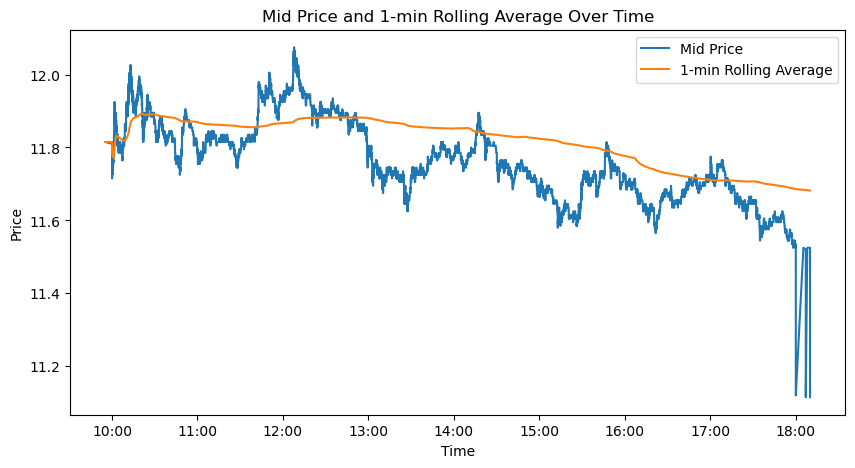

In [24]:
import matplotlib.dates as mdates
import pytz

# Determine the time zone
istanbul_tz = pytz.timezone('Europe/Istanbul')

# Plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the original mid prices
ax.plot(lob_snaps_filtered['Date'], lob_snaps_filtered['midpx'], label='Mid Price')

# Plot the rolling average
ax.plot(lob_snaps_filtered['Date'], lob_snaps_filtered['midpx_60s_avg'], label='1-min Rolling Average')

# Set the time format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=istanbul_tz))

plt.title('Mid Price and 1-min Rolling Average Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')  # Add a legend

plt.show()


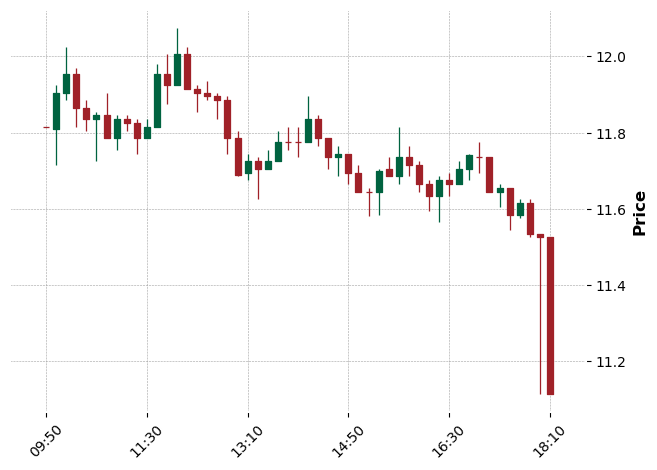

In [30]:
ohlc = lob_snaps_filtered.resample('10T', on='Date').agg({
    'midpx': ['first', 'max', 'min', 'last']})

# Set column names to expected OHLC names
ohlc.columns = ['Open', 'High', 'Low', 'Close']

# Use mplfinance to plot the data
import mplfinance as mpf
mpf.plot(ohlc, type='candle', style='charles')
